# Sex as a biological covariate in genetic studies
#### Webinar for Quantitative Genetics Tools  
#### NIDA Center of Excellence in Omics, Systems Genetics, and the Addictome

Saunak Sen  
Professor and Chief of Biostatistics  
Deparment of Preventive Medicine  
University of Tennessee Health Science Center  
sen@uthsc.edu ~ @saunaksen ~ http://www.senresearch.org

2020-09-11 

Please mute your speakers to reduce any ambient noise that may interfere with others hearing.  

Please ask questions using the chat option at the bottom of your screen.

# Overview

- Overview of QTL studies
- Design considerations with sex
- Sex as a covariate in QTL analysis
- X chromosome segregation
- Proper analysis of X chromosome

# Experimental crosses

If two inbred rat strains show consistent difference in a
phenotype in the same environment, we know the difference must
be genetic. 

By crossing two rat strains we can create a population of 
(approximately) randomly shuffled genomes.

Association between phenotype and genotype may be interpreted to
be causal.

Examples include, backcross and intercross populations,
heterogeneous stock, recombinant inbred lines.

QTL: Quantitative trait loci are genetic loci contributing to
variation in quantitative traits

# Intercross and heterogeneous stock

![CrossFigure](images/HSratsFig1.png)

Credit: Ratgenes.org

# Causal model for QTL inducing correlation between marker and phenotype

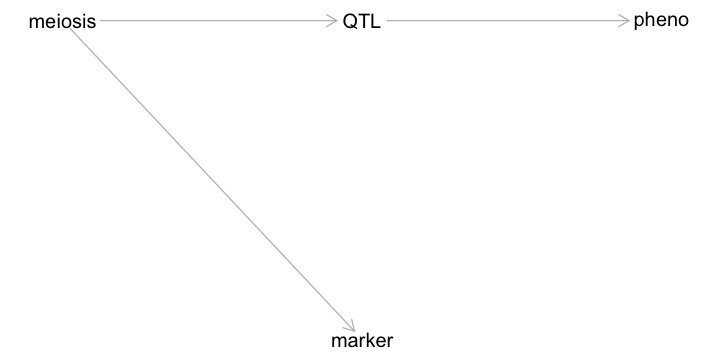

In [1]:
library(dagitty)
options(repr.plot.width=6, repr.plot.height=3)
grQtlMarker <- dagitty('dag{
QTL [pos="1,0"]
pheno [pos="2,0"]
marker [pos="1,1"]
meiosis [pos="0,0"]
QTL -> pheno
meiosis -> QTL
meiosis -> marker
}')
plot(grQtlMarker)

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _causes_ the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.

Since the QTL (and meiosis) is not directly observable, we test for association between genetic markers and phenotype (trait).  The markers associated with the trait are likely to be physically close to the QTL (idea of genome scan).

See Greenland, Pearl, and Robins (1999) for more on causal diagrams.

# Sex as a biological covariate

- Is it a covariate (independent cause)
- Is it a phenotype (outcome)?
- Is it a mediator?

# Causal diagram: sex as covariate

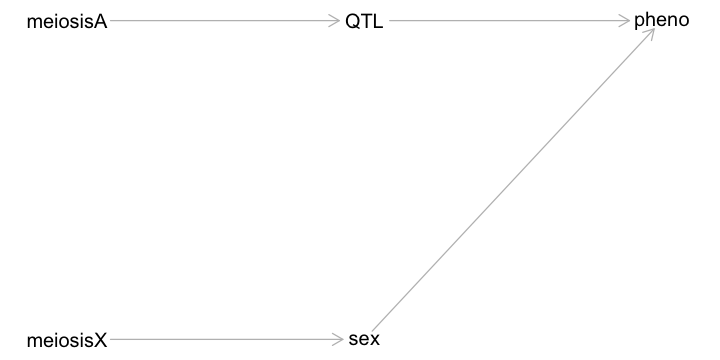

In [2]:
options(repr.plot.width=6, repr.plot.height=3)
gr2 <- dagitty('dag{
QTL [pos="1,0"]
pheno [pos="2,0"]
sex [pos="1,1"]
meiosisA [pos="0,0"]
meiosisX [pos="0,1"]
QTL -> pheno
meiosisA -> QTL
meiosisX -> sex
sex -> pheno
}')
plot(gr2)

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _contributes_ to the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.
- Sex _contributes_ to the phenotype.
- Sex is _causally unconnected_ to the QTL.
- Not adjusting for sex will not lead to bias, but may be less powerful.

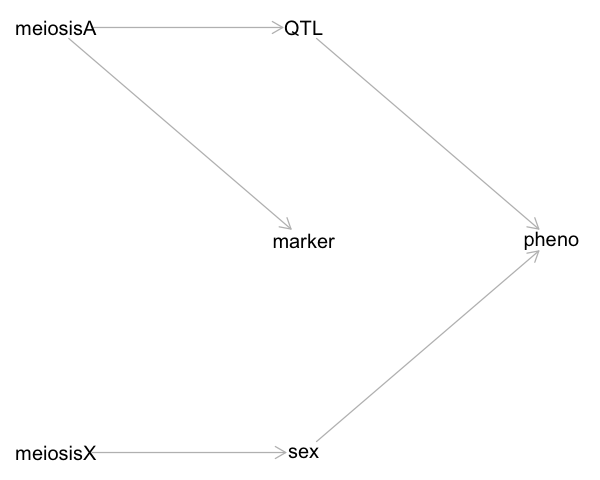

In [3]:
options(repr.plot.width=5, repr.plot.height=4)
grQtlMarkerSex <- dagitty('dag{
QTL [pos="1,0"]
sex [pos="1,2"]
pheno [pos="2,1"]
marker [pos="1,1"]
meiosisA [pos="0,0"]
meiosisX [pos="0,2"]
QTL -> pheno
sex -> pheno
meiosisA -> QTL
meiosisA -> marker
meiosisX -> sex
}')
plot(grQtlMarkerSex)

# X chromsome QTL

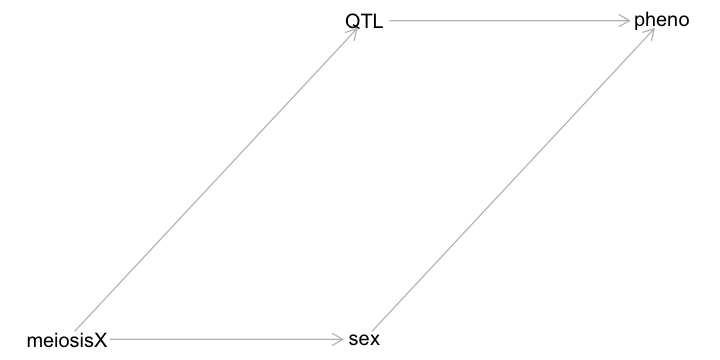

In [4]:
options(repr.plot.width=6, repr.plot.height=3)
grXQtl <- dagitty('dag{
QTL [pos="1,0"]
pheno [pos="2,0"]
sex [pos="1,1"]
meiosisX [pos="0,1"]
QTL -> pheno
meiosisX -> QTL
meiosisX -> sex
sex -> pheno
}')
plot(grXQtl)

- Meiosis randomizes the QTL (assumed observed via close marker) and sex (observed).  
- The QTL and sex both _contribute_ to the phenotype.
- If sex is an independent cause, and not adjusted, apparent association between QTL and phenotype is possible.
- Similar considerations apply for cross direction.

See Broman (2006) for more.

In [5]:
if(!require("qtl"))
    install.packages("qtl")
library(qtl)
if(!require("vioplot"))
    install.packages("vioplot")
library(vioplot)

Loading required package: qtl

Loading required package: vioplot

Loading required package: sm

Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# F$_2$ cross between F344 and WKY rats (Solberg et. al. 2009)

Wistar–Kyoto (WKY) rat exhibits physiological and behavioral similarities to endophenotypes of
human depression. A series of study were conducted to examine the genetic connections between behavior and physiology.

![F344](images/F344.jpg "F344") ![WKY](images/WKY.jpg "WKY")

Data from Solberg Woods (2009).

Fig credit: Charles River

In [6]:
solbergURL <- "https://phenomedoc.jax.org/QTL_Archive/solberg_2004/Solberg2004_F344xWKY_Data.csv"
cr <- read.cross(file=solbergURL,format="csv",genotypes=c("a","h","b","c","d"),crosstype="f2",alleles=c("F344","WKY"))

 --Read the following data:
	 486  individuals
	 112  markers
	 25  phenotypes


Warning message in fixXgeno.f2(cross, alleles):
“ --Omitted 1 additional X chr genotype(s).”
Warning message in summary.cross(cross):
“Some markers at the same position on chr 6; use jittermap().”


 --Cross type: f2 


In [7]:
names(cr$pheno)

[1] "animal"                "sex"                   "pgm"                  
 [4] "litter"                "DBshocks"              "DBapproaches"         
 [7] "DBlatencytobury"       "DBdurationofburying"   "DBrears"              
[10] "DBgroomtime"           "FSTclimbing"           "FSTimmobility"        
[13] "TSH"                   "OFTinnerlinecrossings" "OFTrears"             
[16] "OFTgroom.time"         "CORT0"                 "CORT10"               
[19] "adrenalwt"             "weight11"              "weight17"             
[22] "glucose30"             "glucpostglucchall"     "fastinggluc"          
[25] "insulinpostglucchall"

In [8]:
table(cr$pheno$sex,cr$pheno$pgm,dnn=c("sex","pgm"))

   pgm
sex   0   1
  0 111 112
  1 135 128

# Violin plot: Log2 glucose by sex

Males are coded as 1, females as 0

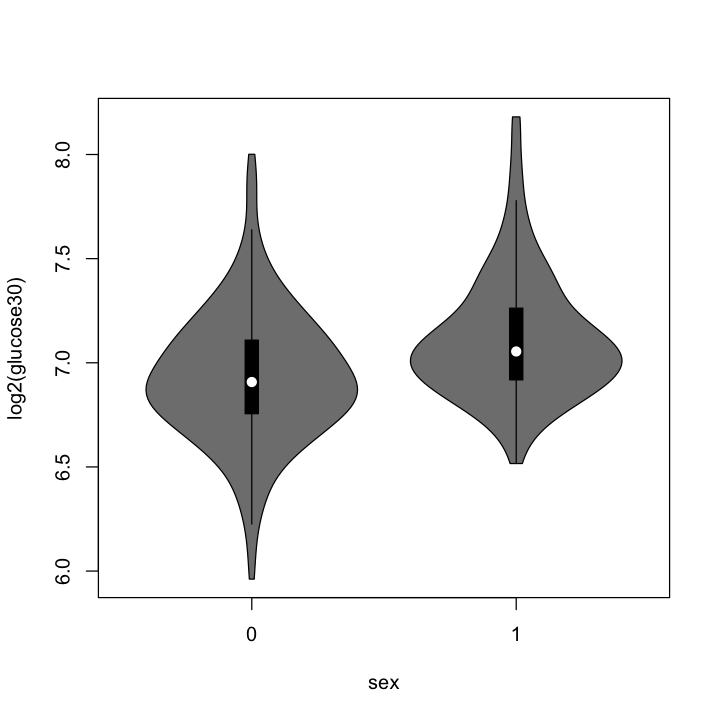

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
vioplot(log2(glucose30)~sex,data=cr$pheno)

Clearly there is a sex difference in glucose levels.

# Violin plot: Log2 glucose by sex and cross direction

- Males are coded as 1, females as 0
- pgm=0 if F344 is paternal grandmother (direction) (n=246)
- pgm=1 if WKY is paternal grandmother (direction) (n=240)

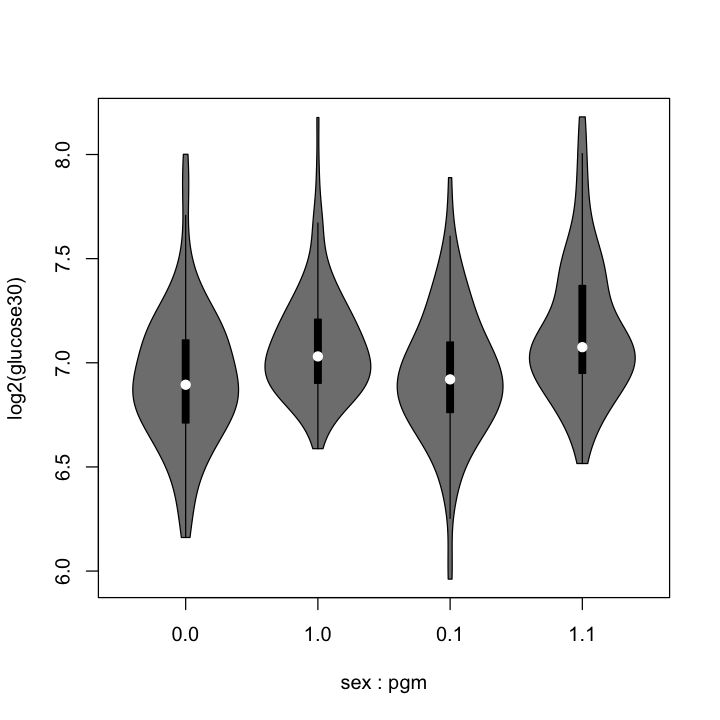

In [10]:
vioplot(log2(glucose30)~sex*pgm,data=cr$pheno)

No difference by cross direction, but let us check by doing linear regression.

In [11]:
summary(lm((glucose30)~sex*pgm,data=cr$pheno))


Call:
lm(formula = (glucose30) ~ sex * pgm, data = cr$pheno)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.267 -19.480  -7.509  12.669 151.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  124.556      2.972  41.914  < 2e-16 ***
sex           13.554      4.024   3.369 0.000817 ***
pgm            1.021      4.184   0.244 0.807302    
sex:pgm        7.163      5.707   1.255 0.210082    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.17 on 476 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.07779,	Adjusted R-squared:  0.07198 
F-statistic: 13.38 on 3 and 476 DF,  p-value: 2.12e-08


Intuition confirmed by linear regression analysis.

# Genome scan

- Null (H0): Pheno ~ error
- Alt (H1): Pheno ~ QTL + error

Compare models for every candidate QTL location (marker/pseudomarker) using a likelihood ratio test.

Genomewide significance established using permutation tests.

In [12]:
cr <- calc.genoprob(cr,step=2)
outglucose30 <- scanone(cr,pheno.col=log2(cr$pheno$glucose30),method="hk")
outglucose30Perm <- scanone(cr,pheno.col=log2(cr$pheno$glucose30),
                            method="hk",n.perm=1024,n.cluster=4)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”


 -Running permutations via a cluster of 4 nodes.


LOD thresholds (1024 permutations)
     lod
5%  3.65
10% 3.26

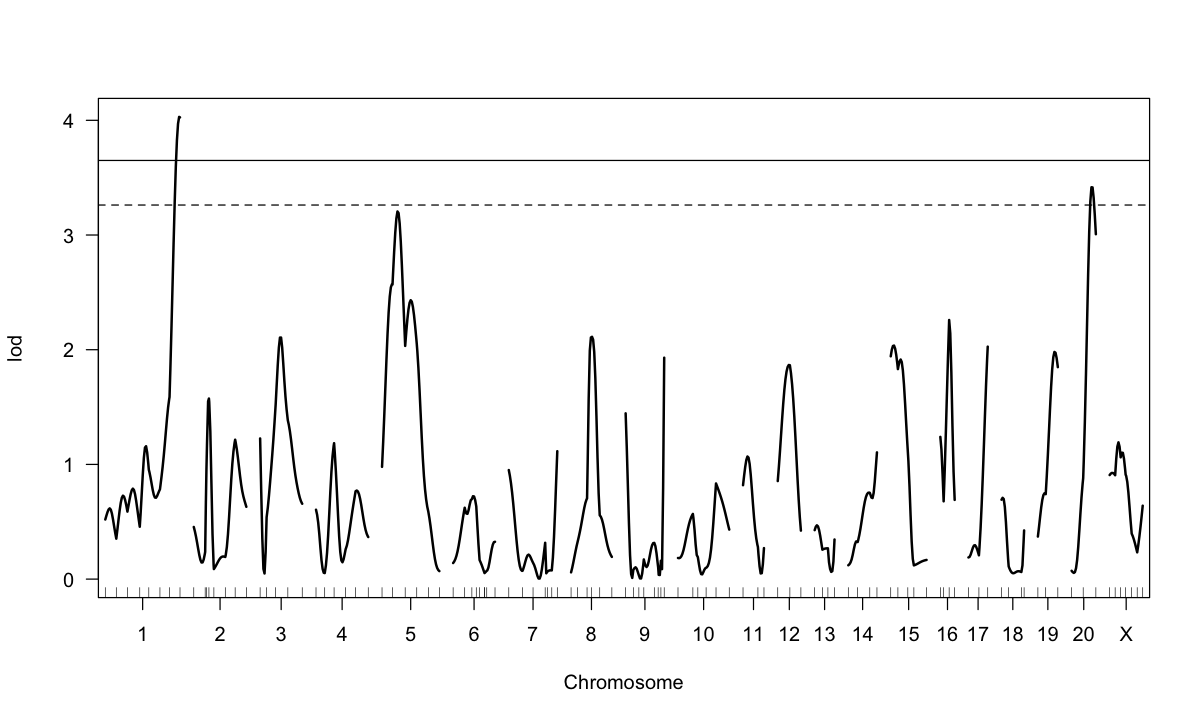

In [13]:
options(repr.plot.width=10, repr.plot.height=6)
summary(outglucose30Perm)
plot(outglucose30)
add.threshold(outglucose30,perms = outglucose30Perm,alpha = 0.05)
add.threshold(outglucose30,perms = outglucose30Perm,alpha = 0.1, lty=2)

# Genome scan with sex as additive covariate

- Null (H0): Pheno ~ sex + error
- Alt (H1): Pheno ~ QTL + sex + error

Note that:
- Null model allows for sex to contribute to phenotype (`addcovar` option)
- Alternative has both contributing
- Permutations stratified by sex (`perm.strata` option)

We use Haley-Knott method for speed, but EM or imputation method could also be used.

In [14]:
outglucose30Sex <- scanone(cr,addcovar=cr$pheno$sex,
                           pheno.col=log2(cr$pheno$glucose30),method="hk")
outglucose30SexPerm <- scanone(cr,addcovar=cr$pheno$sex,
                               perm.strata=cr$pheno$sex,
                               pheno.col=log2(cr$pheno$glucose30),method="hk",n.perm=1024,n.cluster=4)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”
Warning message in scanone(cr, addcovar = cr$pheno$sex, pheno.col = log2(cr$pheno$glucose30), :
“Dropped 1 additive covariates on X chromosome.”


 -Running permutations via a cluster of 4 nodes.


LOD thresholds (1024 permutations)
     lod
5%  3.60
10% 3.26

LOD thresholds (1024 permutations)
     lod
5%  3.65
10% 3.26

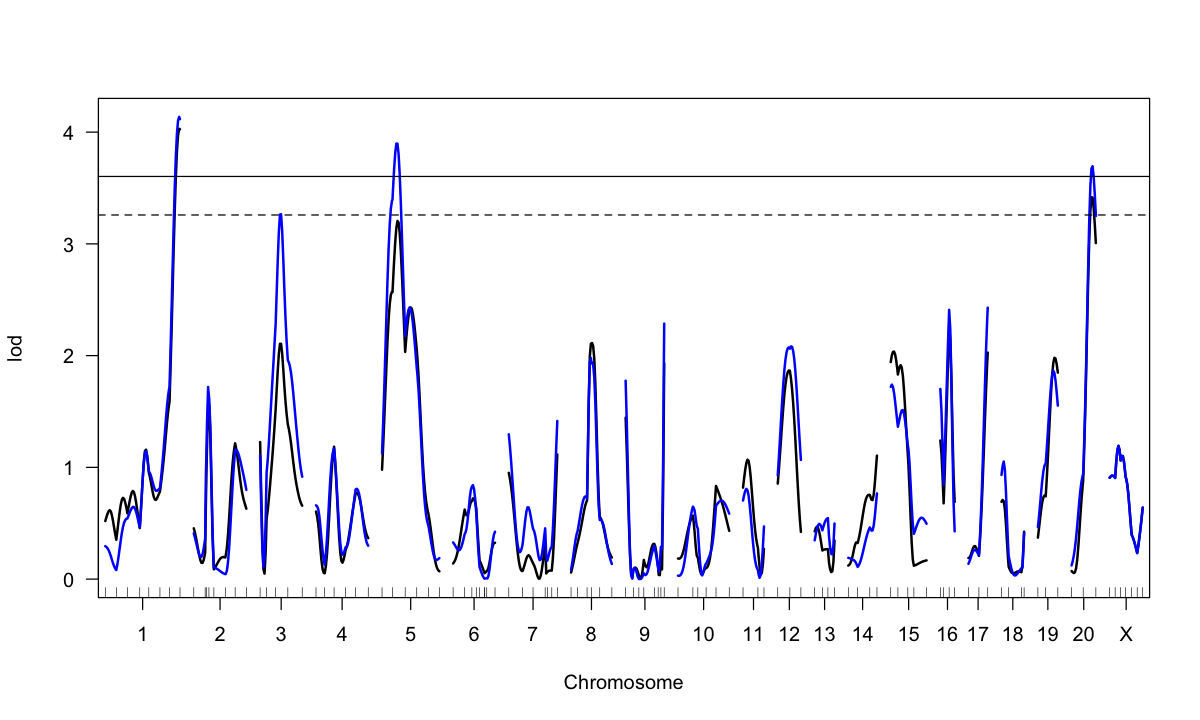

In [15]:
plot(outglucose30,outglucose30Sex)
summary(outglucose30SexPerm)
summary(outglucose30Perm)
add.threshold(outglucose30,perms = outglucose30SexPerm,alpha = 0.05)
add.threshold(outglucose30,perms = outglucose30SexPerm,alpha = 0.1, lty=2)

The thresholds do not change much, but the LOD scores in the sex-adjusted scan (in blue), are bigger, on average, than the unadjusted scans (in black).

# Genome scan with sex as interactive covariate

- Do we want to find QTL allowing for effect modification by sex?  Compare the models:
  * Null (H0): Pheno ~ sex + error
  * Alt (H1): Pheno ~ QTL + sex + QTL*sex + error
- Do we want to search for deviations from additive effects (sex and QTL)? Compare the models:
  * Null (H0): Pheno ~ QTL + sex + error
  * Alt (H1): Pheno ~ QTL + sex + QTL*sex + error
- A third possibility is to not perform a scan, but test for interaction only at selected loci.  

# Genome scan using an interactive model

In [16]:
outglucose30SexInt <- scanone(cr,intcovar=cr$pheno$sex,
                              pheno.col=log2(cr$pheno$glucose30),method="hk")
outglucose30SexIntPerm <- scanone(cr,intcovar=cr$pheno$sex,
                                  perm.strata=cr$pheno$sex,
                               pheno.col=log2(cr$pheno$glucose30),method="hk",n.perm=1024,n.cluster=4)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“addcovar forced to contain all columns of intcovar
”
Warning message in scanone(cr, intcovar = cr$pheno$sex, pheno.col = log2(cr$pheno$glucose30), :
“Dropped 1 additive covariates on X chromosome.”
Warning message in scanone(cr, intcovar = cr$pheno$sex, pheno.col = log2(cr$pheno$glucose30), :
“Dropped 1 interactive covariates on X chromosome.”


 -Running permutations via a cluster of 4 nodes.


In [17]:
summary(outglucose30SexIntPerm)

LOD thresholds (1024 permutations)
     lod
5%  4.76
10% 4.36

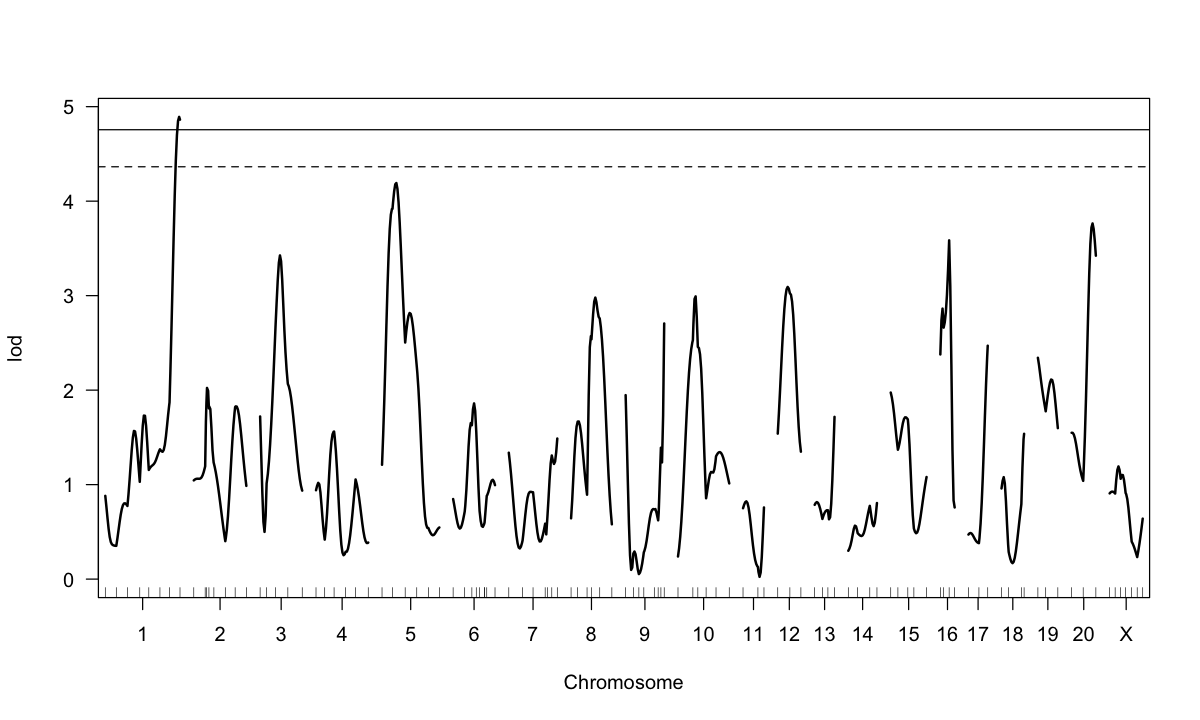

In [18]:
plot(outglucose30SexInt)
add.threshold(outglucose30SexInt,perms = outglucose30SexIntPerm,alpha = 0.05)
add.threshold(outglucose30SexInt,perms = outglucose30SexIntPerm,alpha = 0.10,lty=2)

# Genome scan for deviation from additivity

We have to set the seed before running permutations, so that the permutation threshold is properly calculated.

In [19]:
set.seed(20200911)
outglucose30SexPerm <- scanone(cr,addcovar=cr$pheno$sex,perm.strata=cr$pheno$sex,
                               pheno.col=log2(cr$pheno$glucose30),n.perm=1024,
                               method="hk",n.cluster=4)
set.seed(20200911)
outglucose30SexIntPerm <- scanone(cr,intcovar=cr$pheno$sex,perm.strata=cr$pheno$sex,
                               pheno.col=log2(cr$pheno$glucose30),n.perm=1024,
                               method="hk",n.cluster=4)

 -Running permutations via a cluster of 4 nodes.
 -Running permutations via a cluster of 4 nodes.


In [20]:
outglucose30SexIntPermDiff <- outglucose30SexIntPerm - outglucose30SexPerm
summary(outglucose30SexIntPermDiff)

LOD thresholds (1024 permutations)
     lod
5%  2.11
10% 1.76

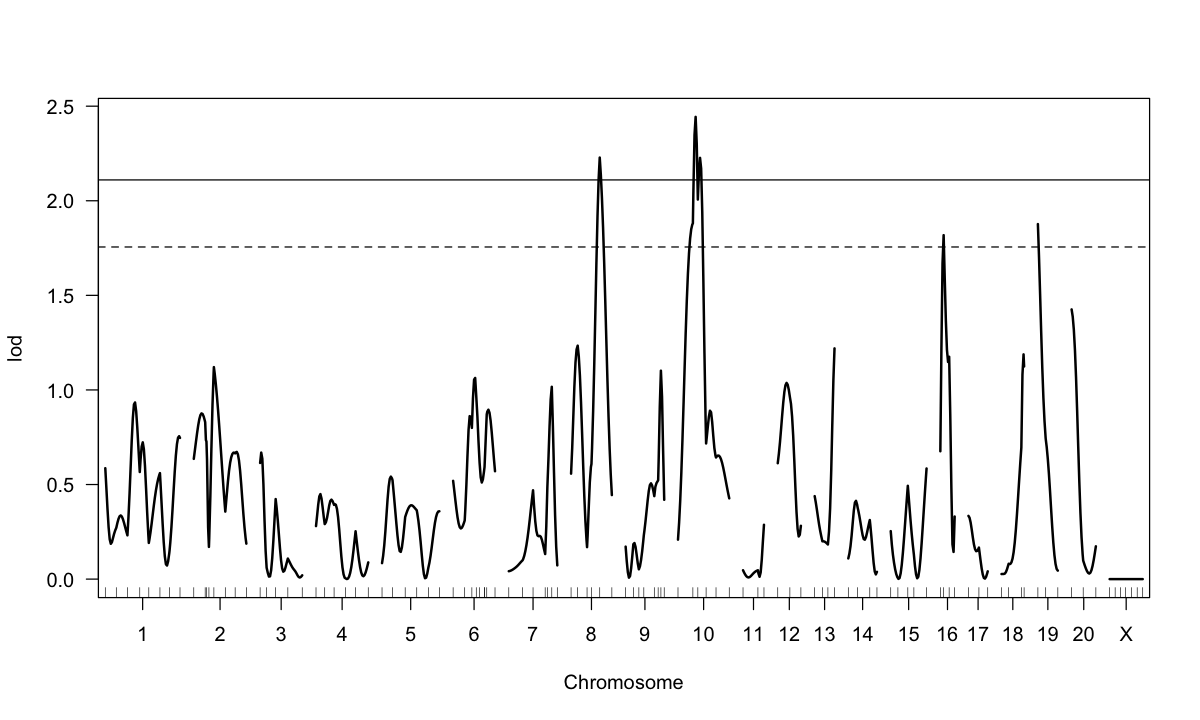

In [21]:
plot(outglucose30SexInt-outglucose30Sex)
add.threshold(outglucose30SexInt-outglucose30Sex,perms=outglucose30SexIntPermDiff,alpha=0.05)
add.threshold(outglucose30SexInt-outglucose30Sex,perms=outglucose30SexIntPermDiff,alpha=0.10,lty=2)

# Proper handling of the X chromosome

- Examine structure of segregation
- Evaluate consequences
- Examples

See Broman (2006) for details.

## X chromosome -- intercross

![X-F2](images/x-f2.png)

Credit: Karl Broman

## X chromosome -- backcross

![X-BC](images/x-bc.png)

Credit: Karl Broman

## X chromosome

Males are hemizygous; males pass on their X chromosome intact,

Genetic structure of X depends on cross direction and sex.

Consider $(A{\times}B) \times (A {\times}B)$ cross where trait has sex
difference but no genetic effect on X chromosome.


                        Genotype
                     AA    AB    BB
    Males            20          20
    Females          10    10
    Both             15    10    20

One will see an apparent X chromosome effect when there is none, if we
don't stratify results by sex.

## Solutions

- Cross direction and sex are needed.
- Rethink null hypothesis; formulate using sex/direction strata
- LOD score degrees of freedom change (1 or 2 for
  backcross; 1, 2, or 3 for F$_2$ intercross).
- Significance thresholds change due to df and recombination
  density.  Choose $1-\alpha_X = (1-\alpha)^{(L_X/L)}$
- Permutations need to be reconsidered.

Recall fundamental principle: We permute individuals 
_exchangeable under the null hypothesis._

For X chromosome, that implies that we should permute within sex, and
cross direction.  In practice, it is computationally simpler to
permute the segregating chromosome across individuals.

In [22]:
outglucose30 <- scanone(cr,pheno.col=log2(cr$pheno$glucose30),method="hk")
outglucose30PermXsp <- scanone(cr,perm.Xsp=TRUE,
                               pheno.col=log2(cr$pheno$glucose30),
                               method="hk",n.perm=1024,n.cluster=4)


Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”


 -Running permutations via a cluster of 4 nodes.


In [23]:
summary(outglucose30Perm)
summary(outglucose30PermXsp)

LOD thresholds (1024 permutations)
     lod
5%  3.65
10% 3.26

Autosome LOD thresholds (1024 permutations)
     lod
5%  3.55
10% 3.20

X chromosome LOD thresholds (22568 permutations)
     lod
5%  4.22
10% 3.83

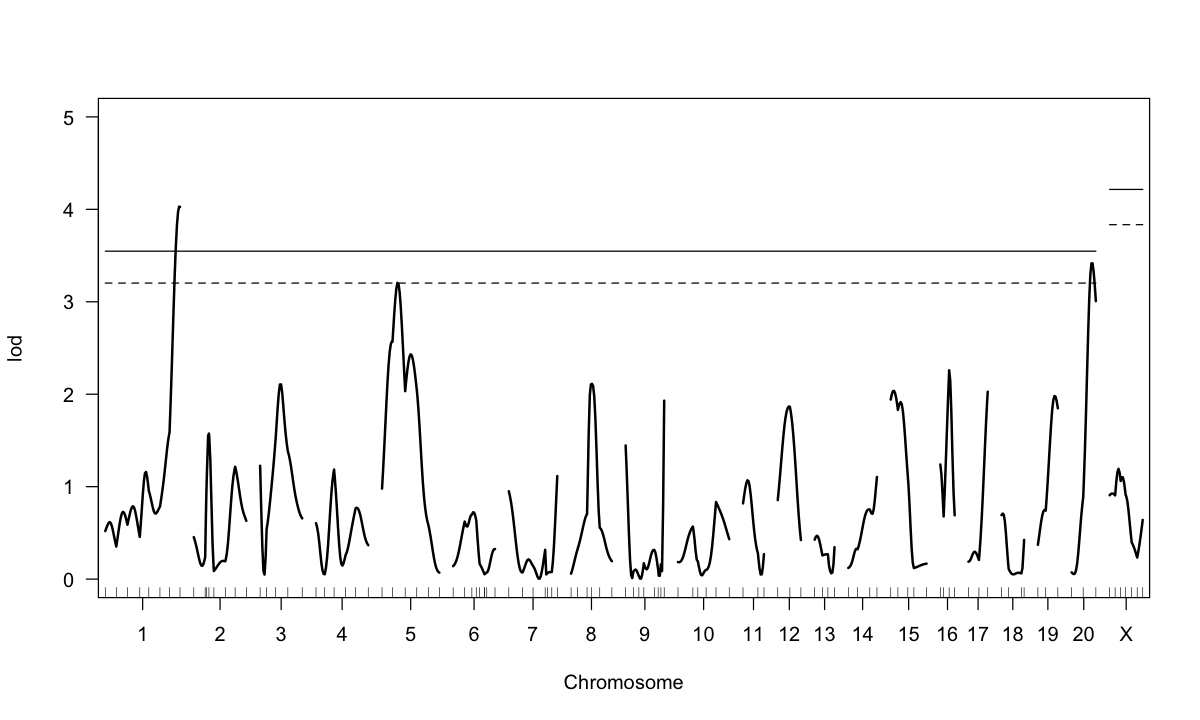

In [24]:
plot(outglucose30,ylim=c(0,5))
add.threshold(outglucose30,perms = outglucose30PermXsp,alpha = 0.05)
add.threshold(outglucose30,perms = outglucose30PermXsp,alpha = 0.1, lty=2)

# Considerations for recombinant inbred lines

- RI lines have the same degree of freedom for tests on the X chromosome (both homozygous genomes are possible).
- The genetic structure of the X chromosome is different: the alleles have a 3:1 ratio of the two parents, the recombination density is lower than autosomes.
- We may want to track the origin of the mitochondrial genome in the population; common RI lines (BXD for mouse and HXB for rats) have both possible mitochondrial genomes represented.
- If animals of both sexes are available traits can be analyzed as multivariate traits (one trait for each sex) or as sum and difference.

# Random effects model for RI lines

Consider the following model for the trait mean in males and females:

$$y_{iM} = \mu_M + \alpha_i + \beta_M q_i + \epsilon_{iM}$$
$$y_{iF} = \mu_F + \alpha_i + \beta_F q_i + \epsilon_{iF}$$

Here $\alpha_i$ is a shared random effect per line; the $\beta$'s are QTL effects in males and females separately.  If we take the difference and the sum, we get:

$$y_{iF} - y_{iM} = (\mu_F - \mu_M) + (\beta_M - \beta_F) q_i + (\epsilon_{iF} - \epsilon_{iM})$$
$$y_{iF} + y_{iM} = (\mu_F + \mu_M) + (\beta_M + \beta_F) q_i + (\epsilon_{iF} + \epsilon_{iM})$$

These are both of the form:
$$y_{iF} - y_{iM} = \mu^* + (\beta_M - \beta_F) q_i + \epsilon^*_{i}$$
$$y_{iF} + y_{iM} = \mu^\dagger + (\beta_M + \beta_F) q_i + \epsilon^\dagger_{iF}$$

Can be analyzed using standard methods.  QTL in the difference are interpreted as sex-QTL interactions; the QTLs in the sum are interpreted as QTL main effects.  

See Lowry (2013), for similar analysis in a GxE context.

# Other considerations

Pseudoautosomal region: Complicated. See Dupuis and Van Eerdewegh (2000). Inheritance probability depends on location in the pseudoautosomal region.

T Manolio on improving diversity in genomic research: "And while we’re at it, let’s look at the X chromosome."

# Summary

- Sex is both a phenotype and an independent (perhaps manipulable) cause
- Design: Useful to have enough animals of both sexes to study sex effects
- Design: Record cross direction/sex in data collection
- Analysis: Consider causal structure of trait to make analytic choices
- Analysis: Use tools apropriate for proper handling of X chromosome loci 

# References

- Broman et. al. (2006) The X chromosome in quantitative trait locus mapping. Genetics. 2006 Dec;174(4):2151-8. 
- Solberg Woods LC, Ahmadiyeh N, Baum A, Shimomura K, Li Q, Steiner DF, Turek FW, Takahashi JS, Churchill GA, Redei EE. Identification of genetic loci involved in diabetes using a rat model of depression. Mamm Genome. 2009 Aug;20(8):486-97.
- Dupuis J and Van Eerdewegh P (2000). Multipoint Linkage Analysis of the Pseudoautosomal Regions, Using Affected Sibling Pairs, Am J Hum Genet. 2000 Aug; 67(2): 462–475.
- Manolio TA (2019) Using the Data We Have: Improving Diversity in Genomic Research. Am J Hum Genet. 2019 Aug 1;105(2):233-236.
- Greenland S, Pearl J, Robins JM. Causal diagrams for epidemiologic research. Epidemiology. 1999 Jan 1:37-48.
- Lowry DB, Logan TL, Santuari L, Hardtke CS, Richards JH, DeRose-Wilson LJ, McKay JK, Sen S, Juenger TE. Expression quantitative trait locus mapping across water availability environments reveals contrasting associations with genomic features in Arabidopsis. Plant Cell. 2013;25 (9) :3266-79.

In [25]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] vioplot_0.3.5 zoo_1.8-8     sm_2.2-5.6    qtl_1.46-2    dagitty_0.3-0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5      MASS_7.3-51.6   uuid_0.1-4      lattice_0.20-41
 [5] rlang_0.4.7     tcltk_4.0.2     tools_4.0.2     parallel_4.0.2 
 [9] grid_4.0.2      htmltools_0.5.0 ellipsis_0.3.1  digest_0.6.25  
[13] lifecycle_0.2.0 crayon_1.3.4    IRdisplay_0.7.0 repr_1.1.0     
[17] base

# Acknowledgements

- Support from NIDA P30 (L Saba, RW Williams)
- Comments/questions from Rob Williams, Karl Broman